In [8]:
import sys
import os

# Thêm đường dẫn của thư mục gốc vào sys.path
project_root = "/Users/qcinsced/Documents/GitHub/awesome-ai-models"  # Chỉnh lại nếu cần
sys.path.append(project_root)


In [9]:
import os
print(os.listdir(os.path.join(project_root, "models/machine_learning")))

['test', '__pycache__', 'logistic_regression.py', 'linear_regression.py']


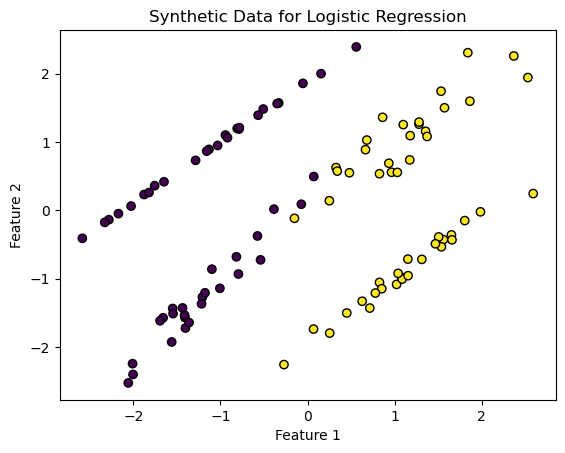

Epoch 0, Loss: 0.6931471805599453
Epoch 100, Loss: 0.16948135239507617
Epoch 200, Loss: 0.11964940197100109
Epoch 300, Loss: 0.09881593831278311
Epoch 400, Loss: 0.08689817436681471
Epoch 500, Loss: 0.07899512806209158
Epoch 600, Loss: 0.0732811075180755
Epoch 700, Loss: 0.06890845869444277
Epoch 800, Loss: 0.06542534217979444
Epoch 900, Loss: 0.0625667964349803
Model Accuracy: 99.00%


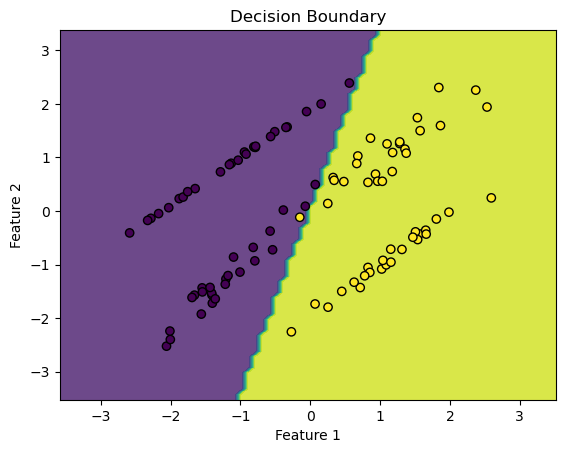

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from models.machine_learning.logistic_regression import LogisticRegression

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
y = y.reshape(-1)  # Ensure y has shape [n_samples]

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title("Synthetic Data for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Initialize and train Logistic Regression model
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X, y)

# Predict probabilities and labels
y_pred_proba = model.predict_proba(X)
y_pred = model.predict(X)

# Evaluate the model
accuracy = np.mean(y_pred == y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, probs, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, model)
